In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv('financial_regression (1).csv')

In [3]:
dt

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.1400,114.4200,114.93,115646960.0,0.7200,46.26,46.520,46.2200,...,45.0200,43.8600,44.84,364528.0,1.1600,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.8400,113.2000,113.64,212252769.0,1.6400,46.46,46.550,45.6500,...,45.7600,44.4000,45.76,442210.0,1.3600,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.1300,113.5900,115.06,138671890.0,1.5400,45.96,46.640,45.9500,...,47.0800,45.7000,46.94,629150.0,1.3800,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.4500,112.9800,113.89,216330645.0,1.4700,46.27,46.604,45.4300,...,47.3100,45.1700,47.05,643198.0,2.1400,109.97,110.05,108.46,108.94,17534231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,2024-10-17,585.91,586.1200,582.1600,582.35,34393714.0,3.9600,496.44,496.490,491.1901,...,96.0259,94.5400,95.68,52414.0,1.4859,247.75,249.06,247.62,248.63,5176170.0
3900,2024-10-18,584.07,585.3900,582.5800,584.59,37416801.0,2.8100,494.06,495.570,493.3000,...,99.6600,97.2700,99.46,205027.0,2.3900,250.00,251.37,249.90,251.27,7833614.0
3901,2024-10-21,583.85,584.8500,580.6001,583.63,36439010.0,4.2499,493.25,496.230,491.3100,...,98.3500,95.8900,97.35,227394.0,2.4600,252.74,253.14,250.73,251.22,9258590.0
3902,2024-10-22,581.05,584.5000,580.3800,583.32,34183835.0,4.1200,492.73,497.445,491.9700,...,99.5899,97.9600,99.41,136431.0,1.6299,253.06,253.94,252.52,253.93,5756321.0


In [4]:
dt.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [5]:
pd.set_option('display.max_columns', None)


In [6]:
dt

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq volume,nasdaq high-low,us_rates_%,CPI,usd_chf,eur_usd,GDP,silver open,silver high,silver low,silver close,silver volume,silver high-low,oil open,oil high,oil low,oil close,oil volume,oil high-low,platinum open,platinum high,platinum low,platinum close,platinum volume,platinum high-low,palladium open,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.1400,114.4200,114.93,115646960.0,0.7200,46.26,46.520,46.2200,46.39,75209000.0,0.3000,NaN,NaN,1.0206,1.4478,NaN,18.58,18.7000,18.450,18.66,69804.0,0.2500,39.30,39.4400,38.880,39.06,8575821.0,0.5600,160.13,161.8500,159.7200,161.45,228500.0,2.1300,43.93,45.0200,43.8600,44.84,364528.0,1.1600,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.8400,113.2000,113.64,212252769.0,1.6400,46.46,46.550,45.6500,45.85,126849300.0,0.9000,NaN,NaN,1.0264,1.4376,NaN,18.54,18.5400,18.360,18.41,205106.0,0.1800,38.97,39.0200,38.280,38.40,12615299.0,0.7400,160.68,161.2500,159.5000,160.25,189900.0,1.7500,45.18,45.7600,44.4000,45.76,442210.0,1.3600,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.1300,113.5900,115.06,138671890.0,1.5400,45.96,46.640,45.9500,46.59,84388200.0,0.6900,NaN,NaN,1.0340,1.4269,NaN,18.53,18.7900,18.500,18.79,130552.0,0.2900,38.07,38.9499,38.030,38.93,8180157.0,0.9199,162.23,165.2000,162.1722,165.12,295900.0,3.0278,46.01,47.0800,45.7000,46.94,629150.0,1.3800,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.4500,112.9800,113.89,216330645.0,1.4700,46.27,46.604,45.4300,45.92,145680000.0,1.1740,NaN,NaN,1.0453,1.4094,NaN,18.31,18.3100,17.780,17.86,230907.0,0.5300,38.23,38.3500,37.880,37.89,11438685.0,0.4700,163.51,163.5100,159.0900,163.22,438200.0,4.4200,46.59,47.3100,45.1700,47.05,643198.0,2.1400,109.97,110.05,108.46,108.94,17534231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,2024-10-17,585.91,586.1200,582.1600,582.35,34393714.0,3.9600,496.44,496.490,491.1901,491.25,27210658.0,5.2999,NaN,NaN,0.8654,1.0837,NaN,30.31,30.5800,29.915,30.25,675311.0,0.6650,72.05,72.8400,71.310,72.62,2541657.0,1.5300,91.96,92.4299,90.5900,91.16,193978.0,1.8399,94.64,96.0259,94.5400,95.68,52414.0,1.4859,247.75,249.06,247.62,248.63,5176170.0
3900,2024-10-18,584.07,585.3900,582.5800,584.59,37416801.0,2.8100,494.06,495.570,493.3000,494.47,25335030.0,2.2700,NaN,NaN,0.8659,1.0854,NaN,30.86,32.1700,30.830,32.12,1167147.0,1.3400,71.74,71.9200,70.570,71.38,4342284.0,1.3500,92.34,93.1499,91.7374,92.98,278642.0,1.4125,97.90,99.6600,97.2700,99.46,205027.0,2.3900,250.00,251.37,249.90,251.27,7833614.0
3901,2024-10-21,583.85,584.8500,580.6001,583.63,36439010.0,4.2499,493.25,496.230,491.3100,495.42,30336549.0,4.9200,NaN,NaN,NaN,NaN,NaN,32.63,32.7150,31.980,32.32,1446558.0,0.7350,72.40,72.8701,71.710,72.26,2941385.0,1.1601,93.32,93.3800,91.9800,92.27,221298.0,1.4000,98.28,98.3500,95.8900,97.35,227394.0,2.4600,252.74,253.14,250.73,251.22,9258590.0
3902,2024-10-22,581.05,584.5000,580.3800,583.32,34183835.0,4.1200,492.73,497.445,491.9700,495.96,26685841.0,5.4750,NaN,NaN,NaN,NaN,NaN,32.91,33.3100,32.730,33.23,1702196.0,0.5800,73.19,74.6500,72.995,73.98,3782109.0,1.6550,93.48,94.5900,93.1001,94.51,317972.0,1.4899,98.77,99.5899,97.9600,99.41,136431.0,1.6299,253.06,253.94,252.52,253.93,5756321.0


In [7]:
dt.shape

(3904, 47)

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [9]:
dt.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [10]:
null_percentage = dt.isnull().mean() * 100
print(null_percentage)

date                   0.000000
sp500 open             4.738730
sp500 high             4.738730
sp500 low              4.738730
sp500 close            4.738730
sp500 volume           4.738730
sp500 high-low         4.738730
nasdaq open            4.738730
nasdaq high            4.738730
nasdaq low             4.738730
nasdaq close           4.738730
nasdaq volume          4.738730
nasdaq high-low        4.738730
us_rates_%            95.491803
CPI                   95.491803
usd_chf                5.379098
eur_usd                5.379098
GDP                   98.539959
silver open            4.738730
silver high            4.738730
silver low             4.738730
silver close           4.738730
silver volume          4.738730
silver high-low        4.738730
oil open               4.738730
oil high               4.738730
oil low                4.738730
oil close              4.738730
oil volume             4.738730
oil high-low           4.738730
platinum open          4.738730
platinum

In [11]:
dt=dt.drop(['GDP','CPI' ,'us_rates_%'], axis = 1)

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  usd_chf             3694 non-null   float64
 14  eur_usd             3694 non-null   float64
 15  silver open         3719 non-null   float64
 16  silver

In [13]:
dt.describe()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq volume,nasdaq high-low,usd_chf,eur_usd,silver open,silver high,silver low,silver close,silver volume,silver high-low,oil open,oil high,oil low,oil close,oil volume,oil high-low,platinum open,platinum high,platinum low,platinum close,platinum volume,platinum high-low,palladium open,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,3.719000e+03,3719.000000,3694.000000,3694.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,4.533532e+07,2.707295,0.947314,1.191437,21.434665,21.608060,21.235299,21.428163,3.857973e+05,0.372762,34.671960,35.026189,34.283314,34.666103,1.628399e+07,0.742875,111.488447,112.153245,110.754099,111.472227,8.952127e+04,1.399146,109.143857,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,2.615688e+07,2.772875,0.052258,0.113520,6.238869,6.328987,6.119707,6.236031,4.968554e+05,0.339369,21.893231,22.122139,21.631574,21.883028,3.038470e+07,0.671002,31.968413,32.048014,31.852717,31.968330,8.406658e+04,0.779432,57.769322,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,7.079300e+06,0.170000,0.729600,0.961600,11.700000,11.890000,11.300000,11.640000,1.494100e+04,0.040000,2.160000,2.250000,2.110000,2.130000,7.346540e+05,0.058000,56.700000,56.880000,55.000000,55.360000,4.833000e+03,0.237900,39.630000,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,2.719832e+07,0.790000,0.912000,1.099925,16.485000,16.599950,16.372500,16.480000,9.487000e+04,0.170000,13.015000,13.165000,12.880000,13.025000,4.632744e+06,0.290000,87.015000,87.705000,86.455050,87.000000,3.578800e+04,0.867850,68.895000,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,3.897366e+07,1.465000,0.946800,1.159100,19.750000,19.900000,19.610000,19.730000,2.088880e+05,0.280000,33.930000,34.250000,33.625000,33.940000,9.291777e+06,0.530000,95.450000,95.975000,94.670000,95.380000,6.440000e+04,1.229900,83.380000,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,5.627353e+07,3.915000,0.983075,1.295475,24.535000,24.725000,24.320000,24.540000,5.023610e+05,0.450000,41.980000,42.460000,41.657500,42.060000,2.111033e+07,0.960000,141.085000,141.800000,140.320050,141.180000,1.124125e+05,1.731100,142.750000,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,2.882004e+08,22.780000,1.161400,1.487500,48.550000,49.280000,47.480000

In [14]:
col=list(dt.columns)

In [15]:
col

['date',
 'sp500 open',
 'sp500 high',
 'sp500 low',
 'sp500 close',
 'sp500 volume',
 'sp500 high-low',
 'nasdaq open',
 'nasdaq high',
 'nasdaq low',
 'nasdaq close',
 'nasdaq volume',
 'nasdaq high-low',
 'usd_chf',
 'eur_usd',
 'silver open',
 'silver high',
 'silver low',
 'silver close',
 'silver volume',
 'silver high-low',
 'oil open',
 'oil high',
 'oil low',
 'oil close',
 'oil volume',
 'oil high-low',
 'platinum open',
 'platinum high',
 'platinum low',
 'platinum close',
 'platinum volume',
 'platinum high-low',
 'palladium open',
 'palladium high',
 'palladium low',
 'palladium close',
 'palladium volume',
 'palladium high-low',
 'gold open',
 'gold high',
 'gold low',
 'gold close',
 'gold volume']

In [16]:
dt.shape

(3904, 44)

In [17]:
for i in col:
    if dt[i].dtypes=='object':
        dt[i]=dt[i].fillna(dt[i].mode()[0])
    else:
        dt[i]=dt[i].fillna(dt[i].mean())

In [18]:
dt.isna().sum()

date                  0
sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
eur_usd               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low        

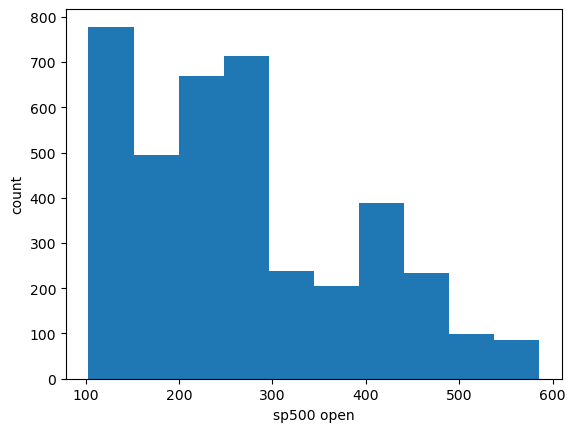

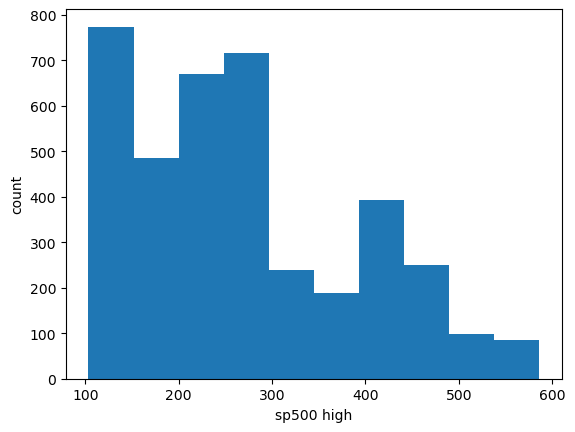

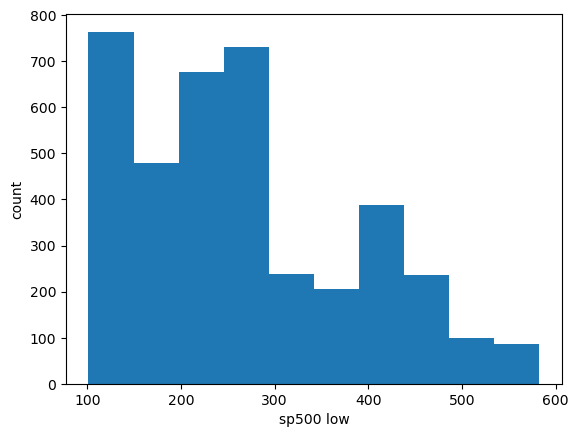

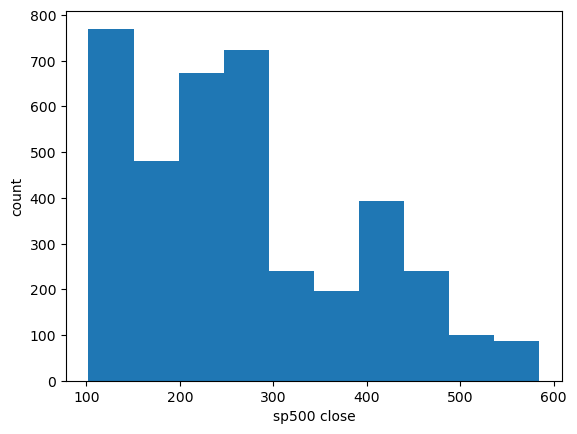

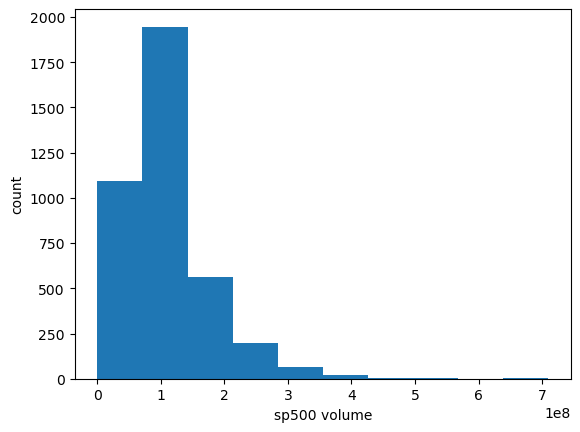

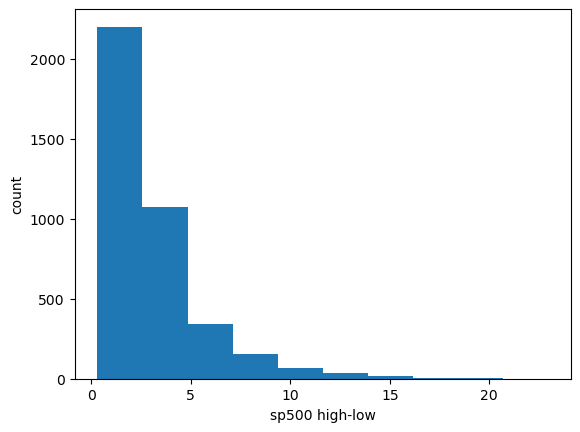

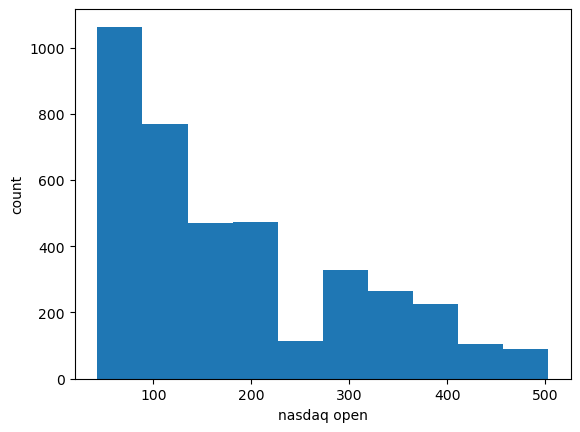

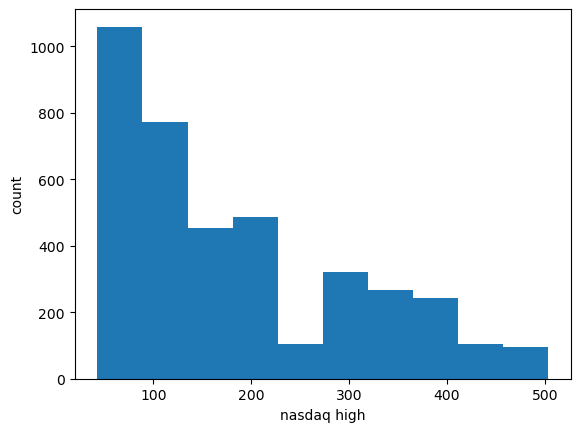

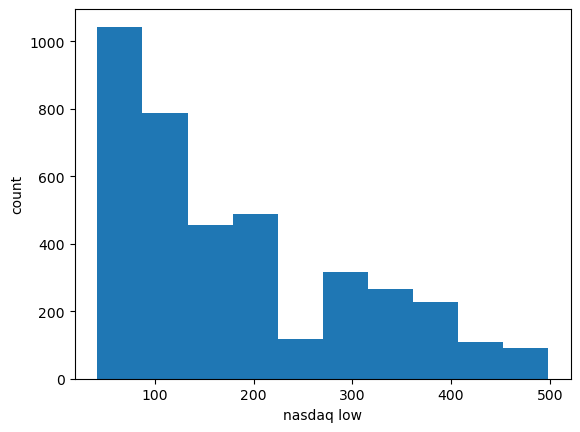

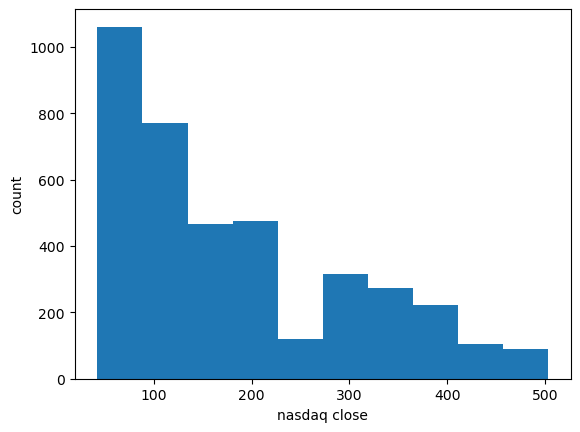

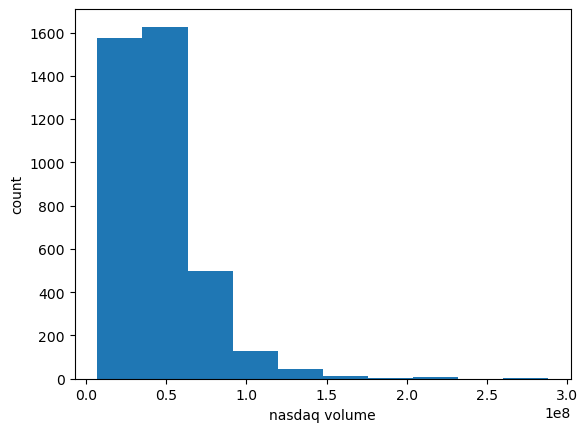

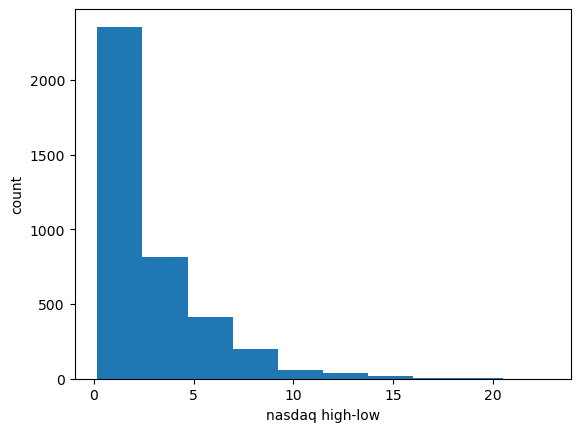

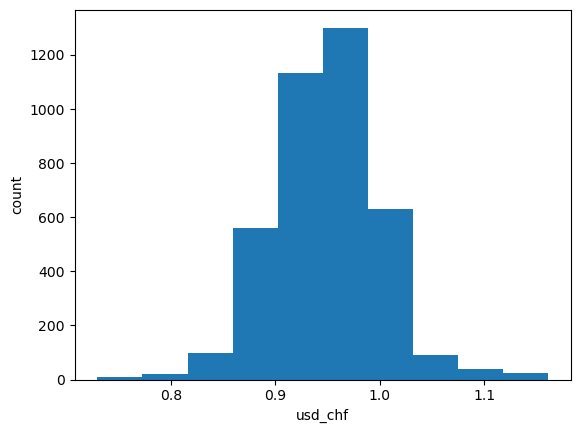

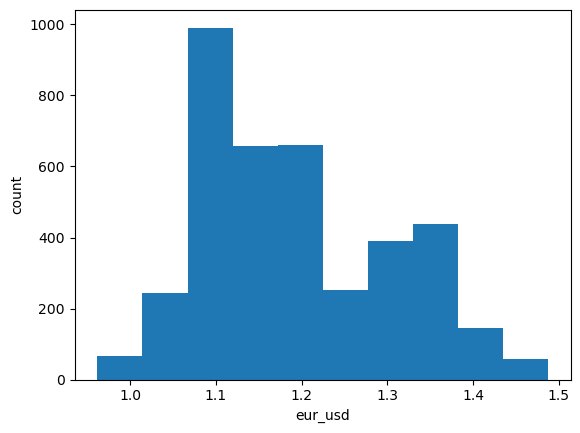

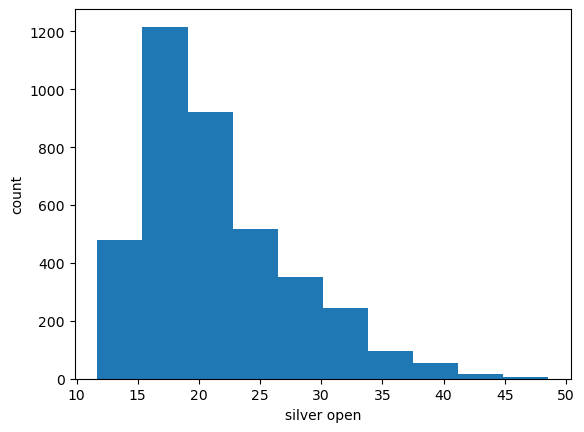

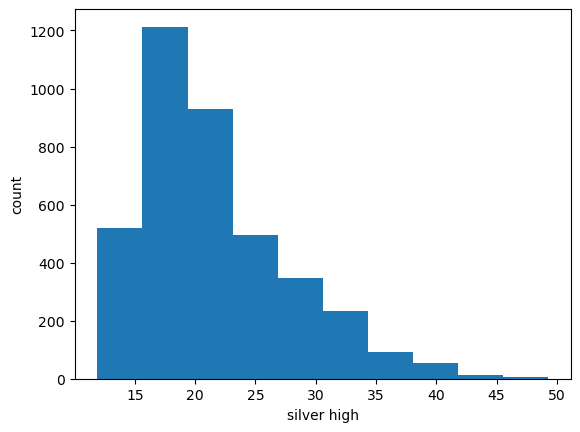

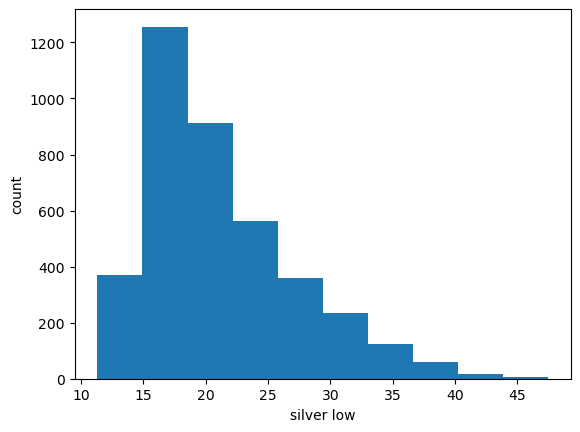

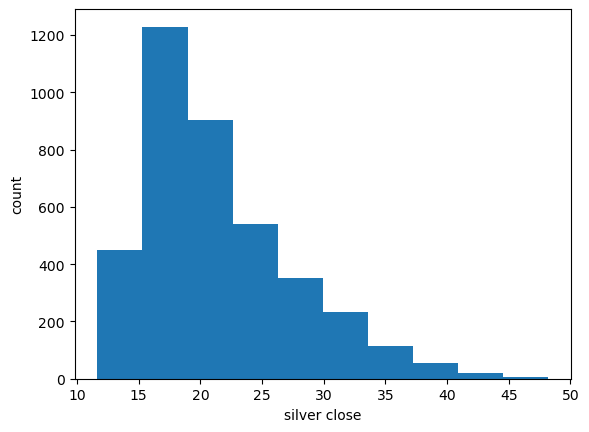

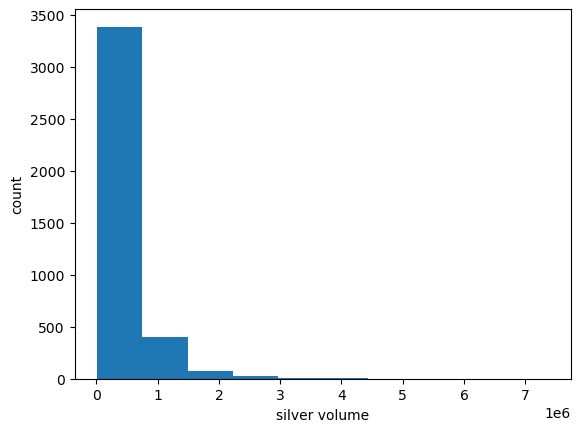

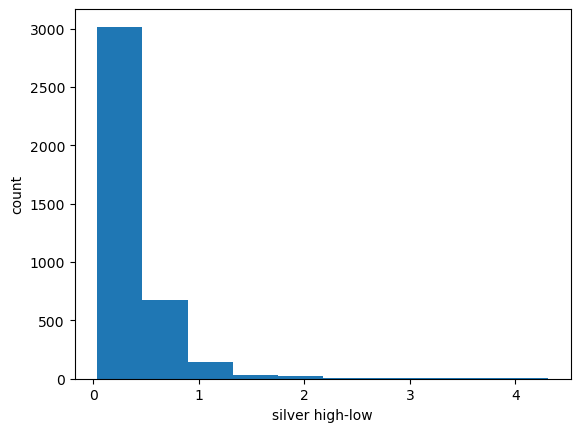

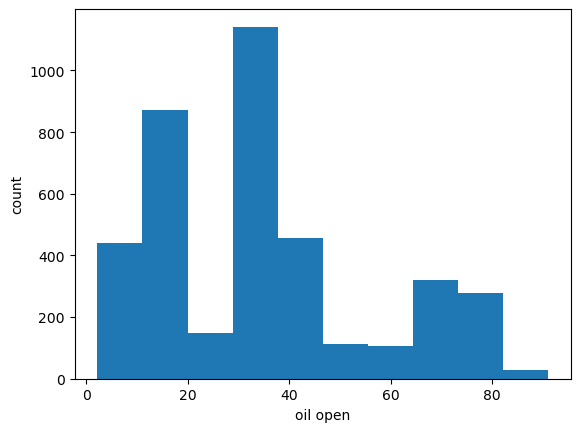

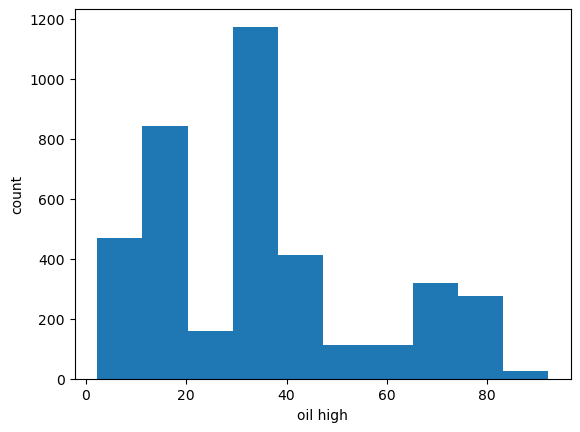

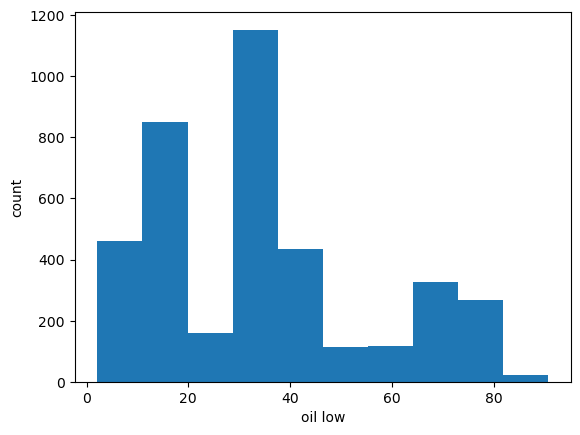

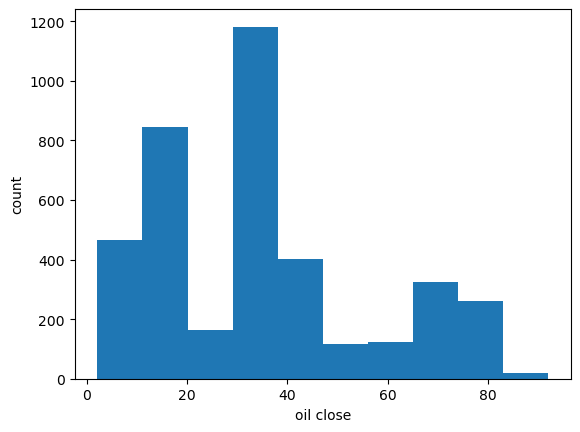

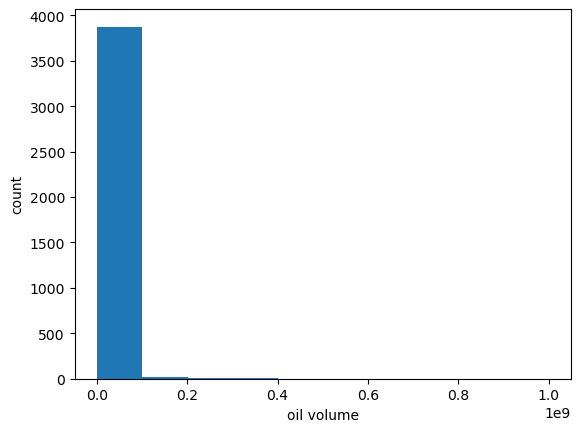

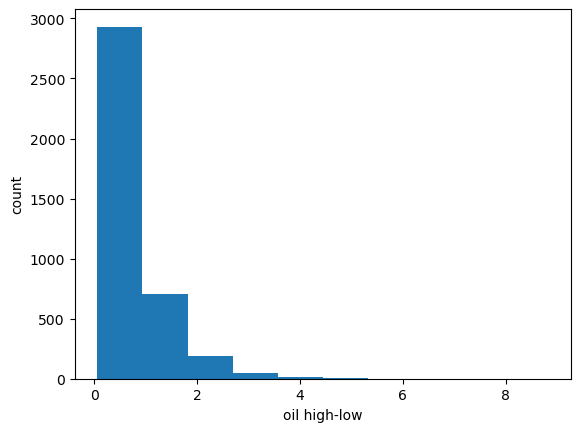

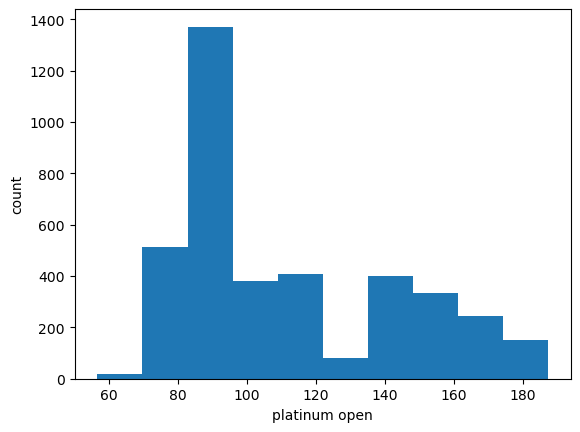

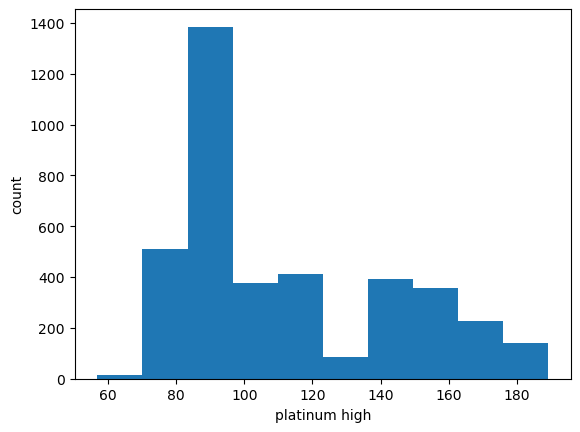

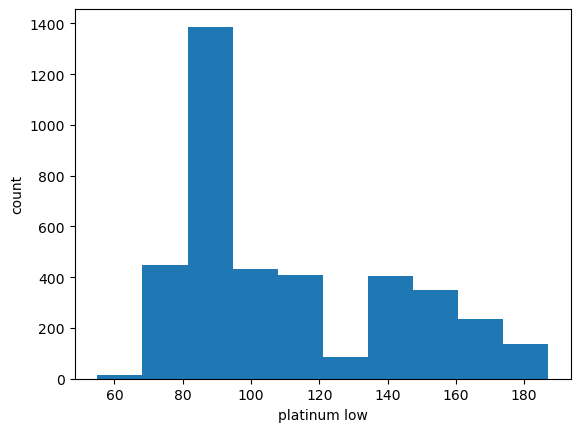

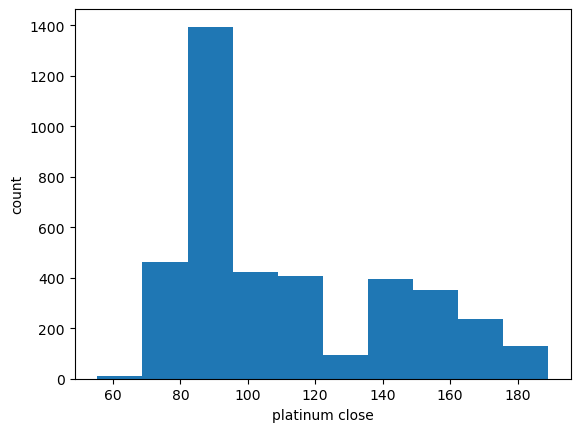

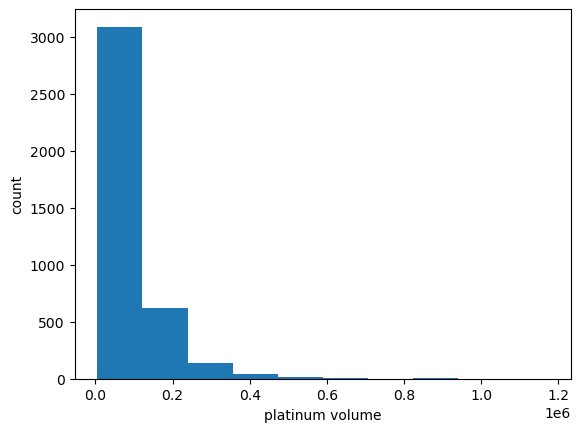

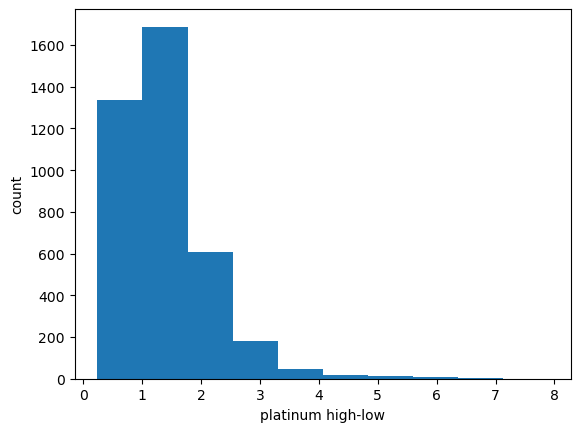

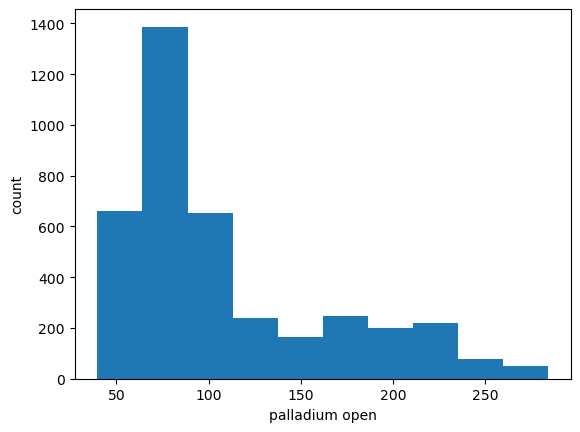

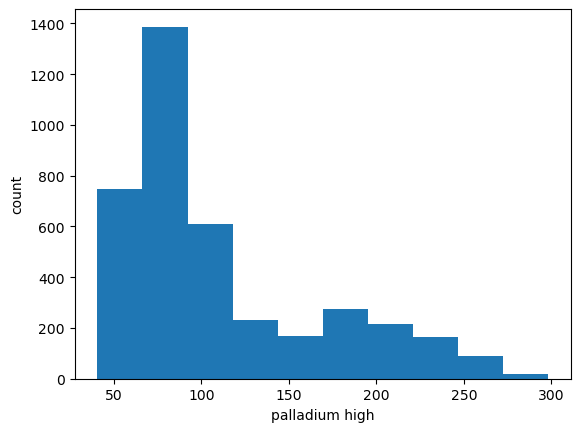

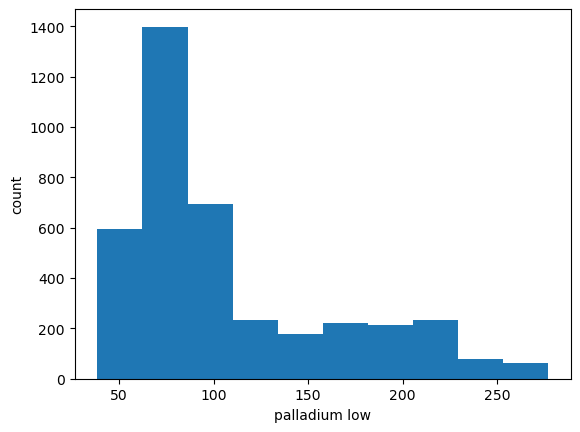

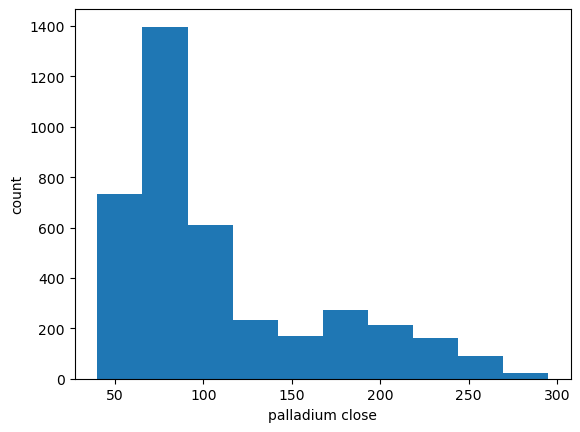

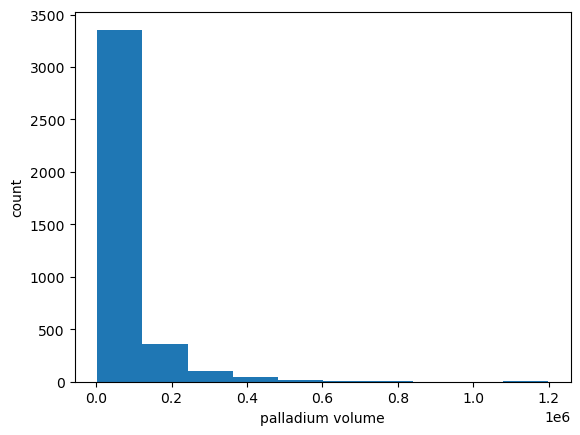

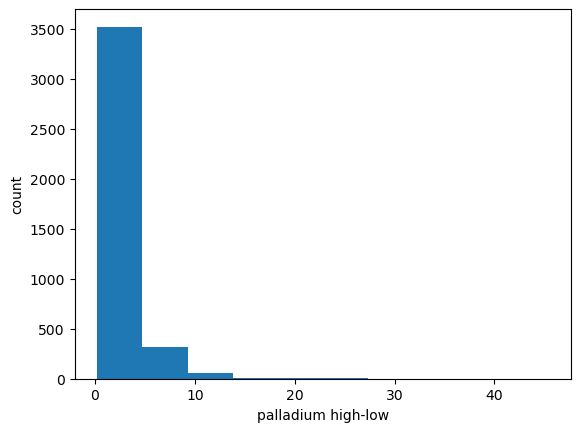

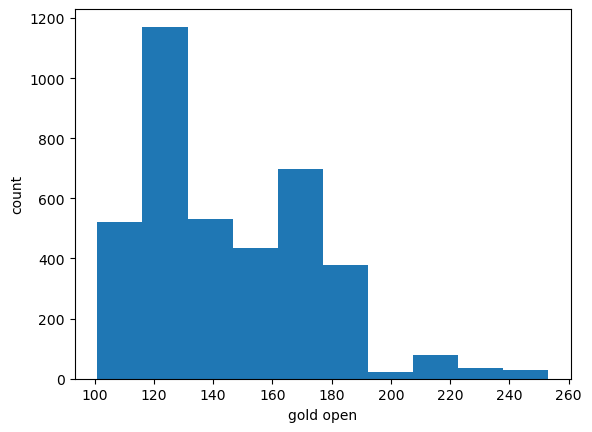

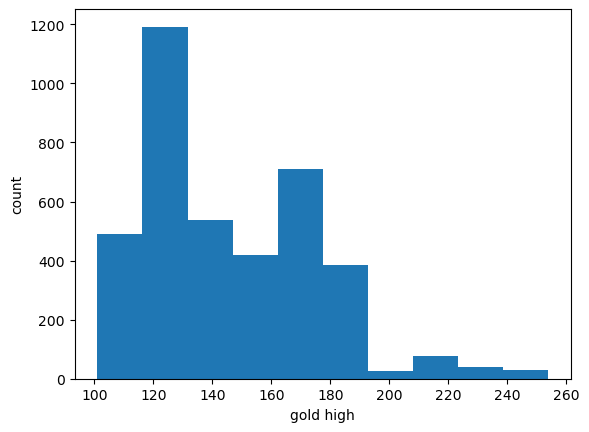

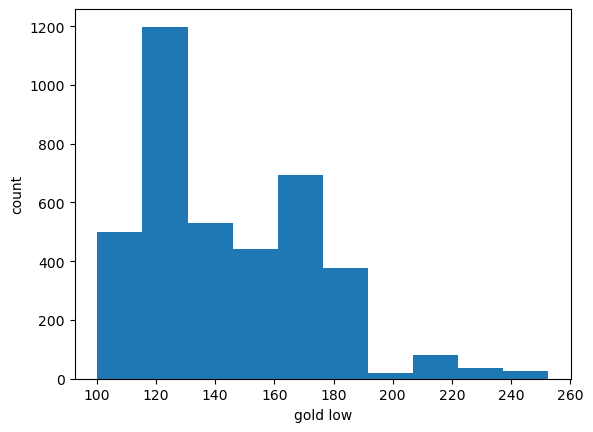

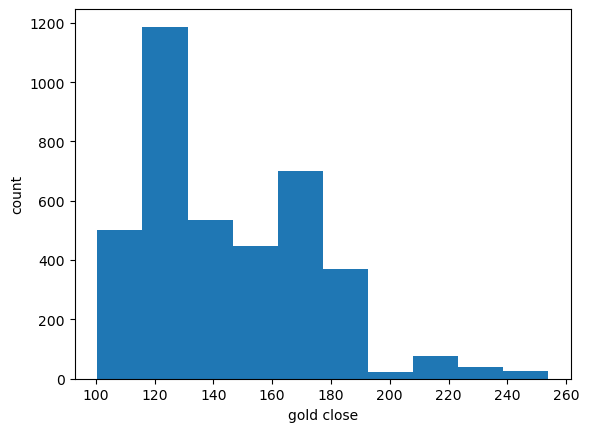

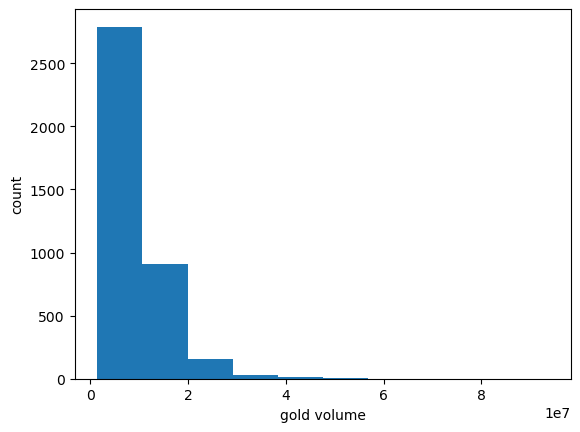

In [19]:
for i in col:
    if dt[i].dtypes=='int64' or dt[i].dtypes=='float64':
        plt.hist(dt[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

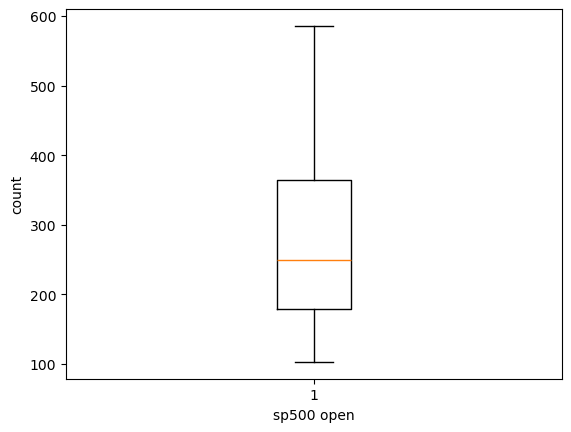

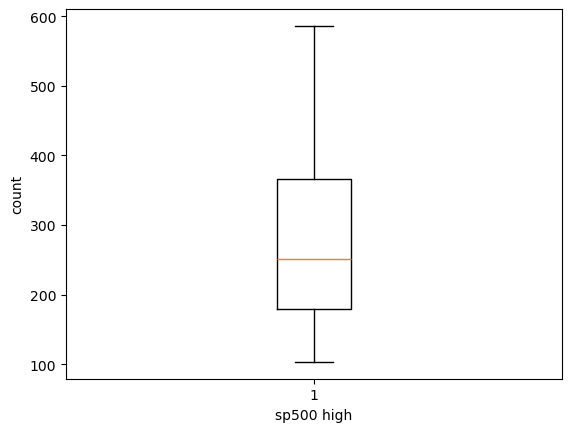

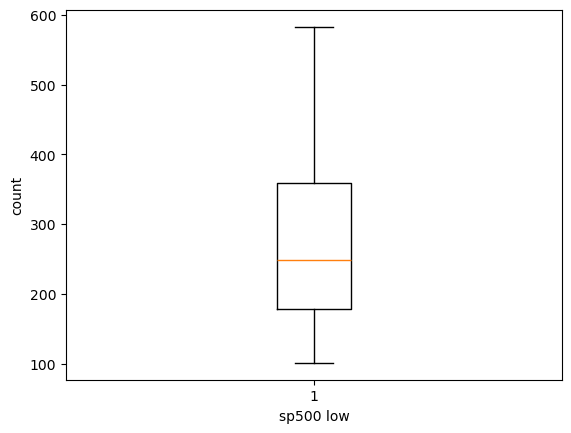

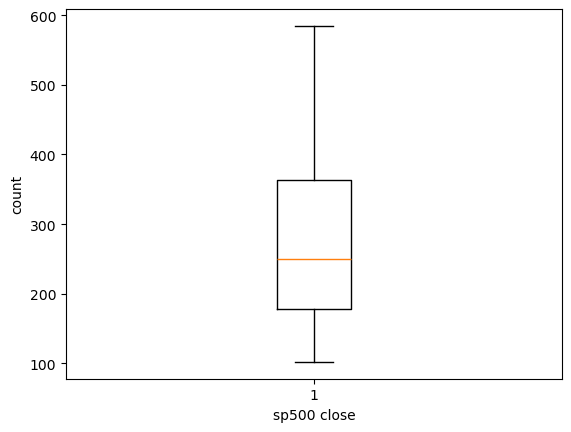

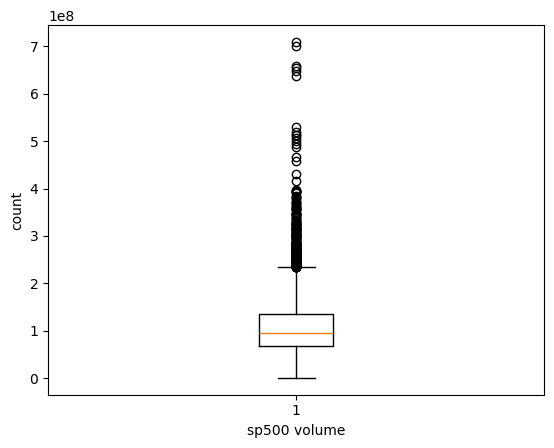

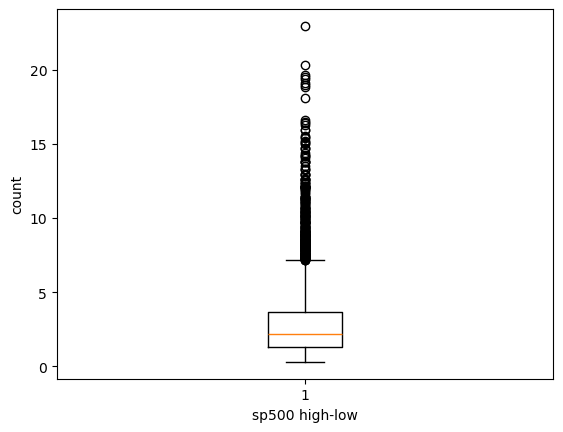

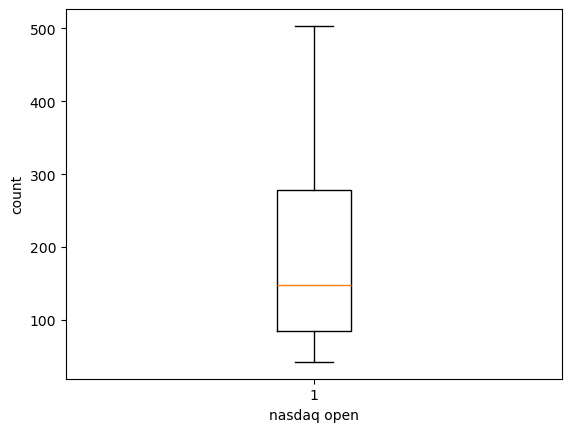

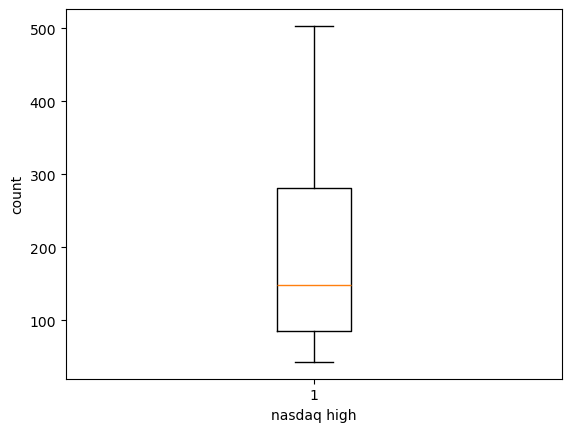

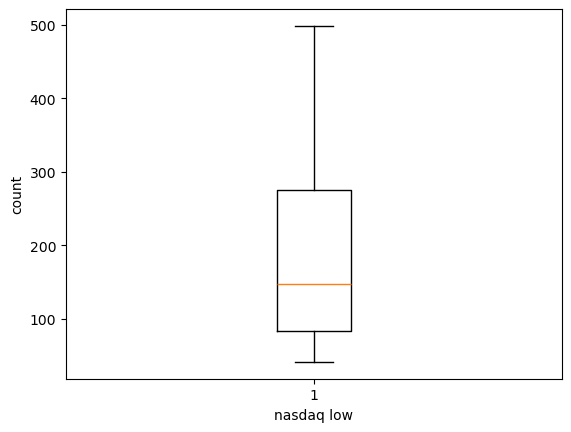

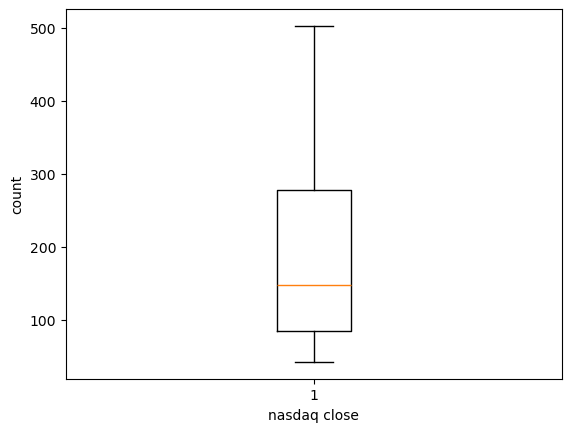

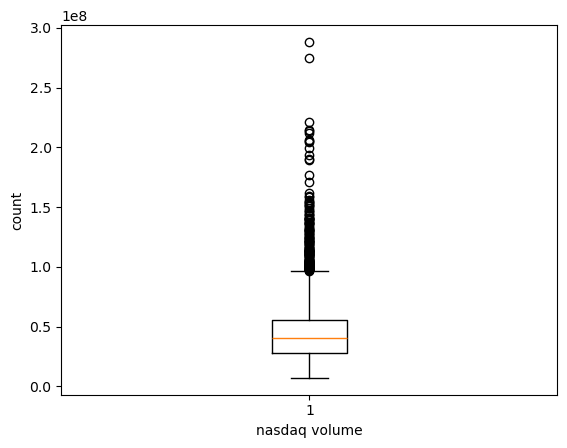

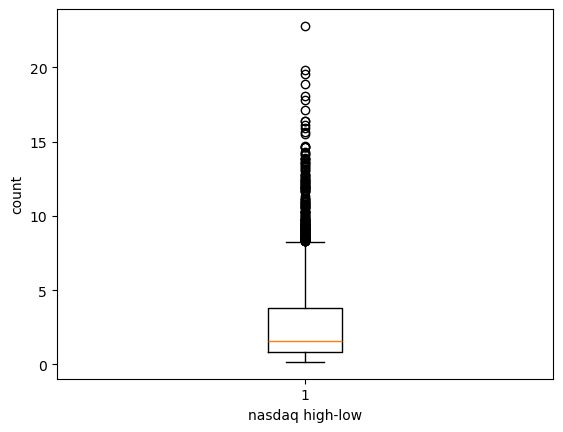

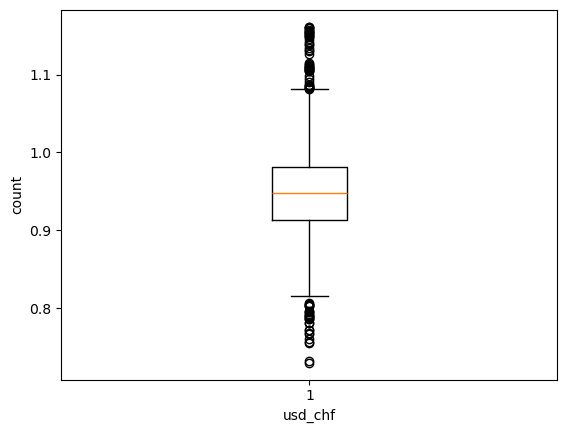

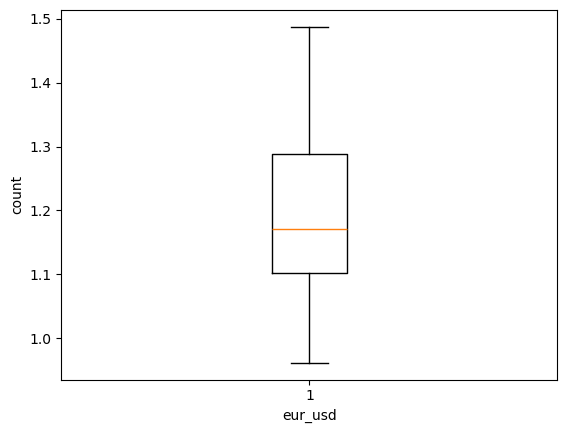

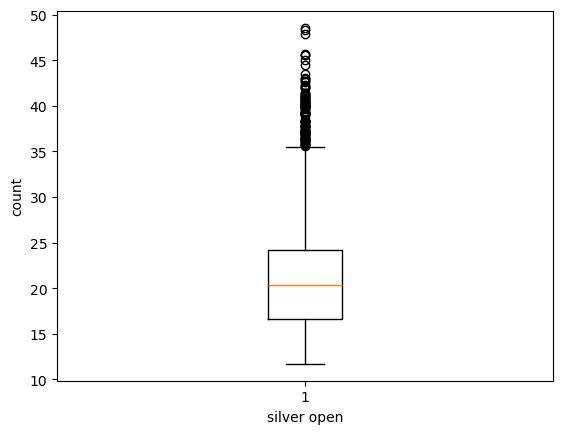

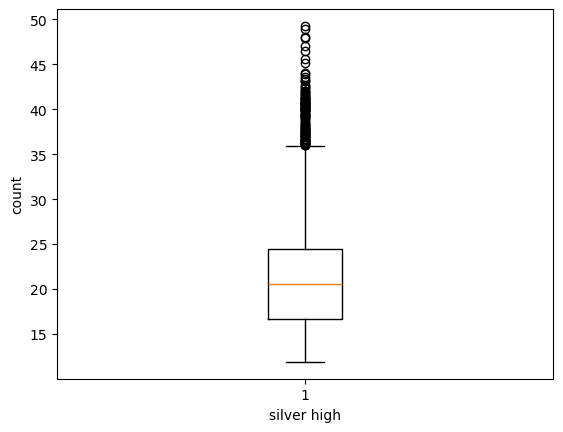

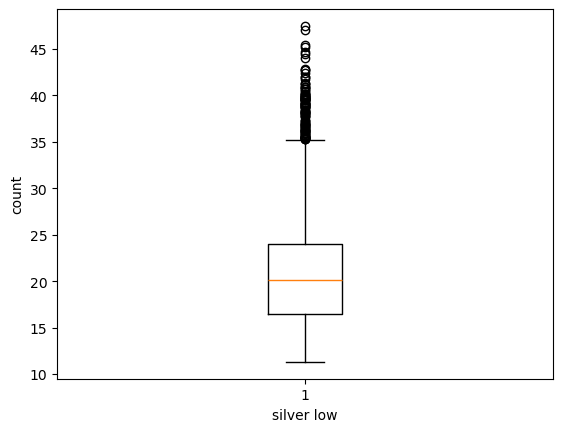

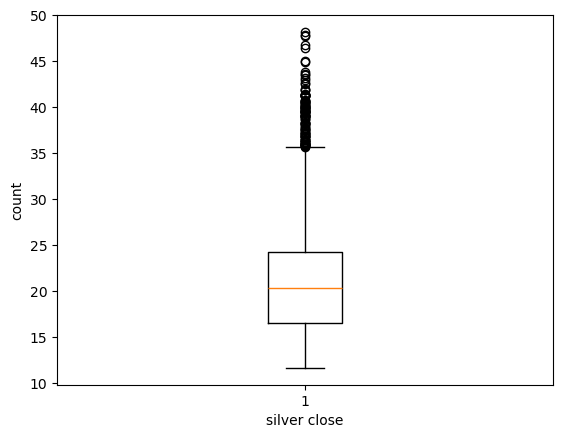

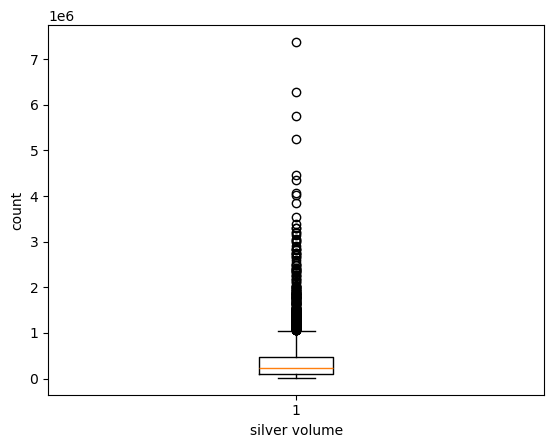

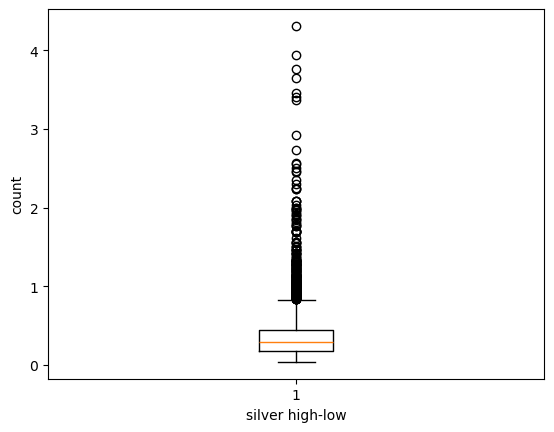

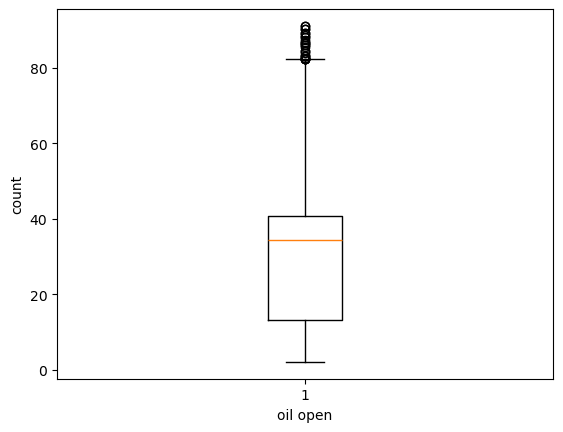

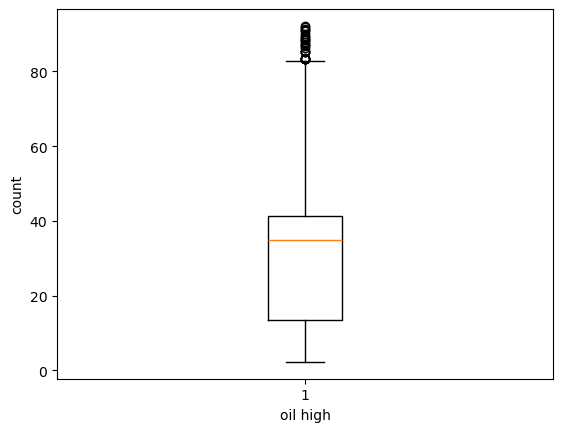

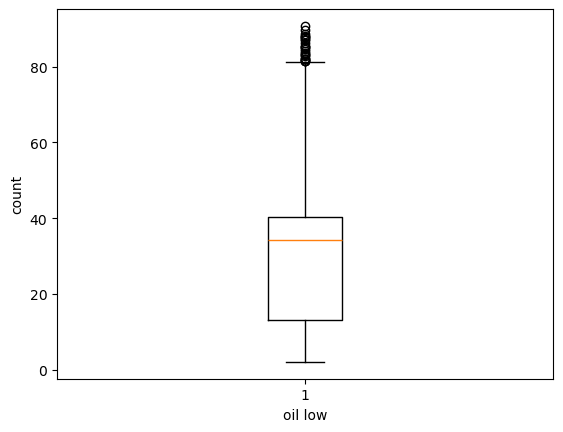

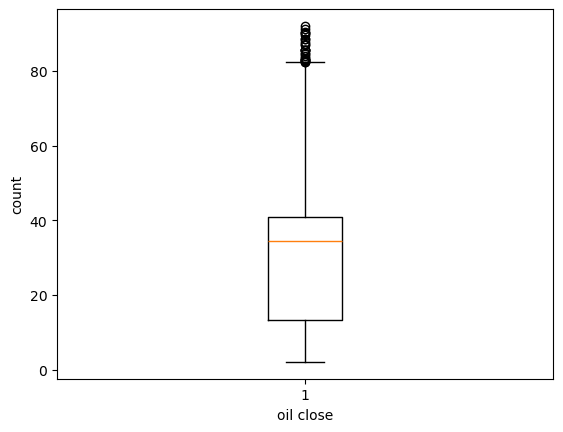

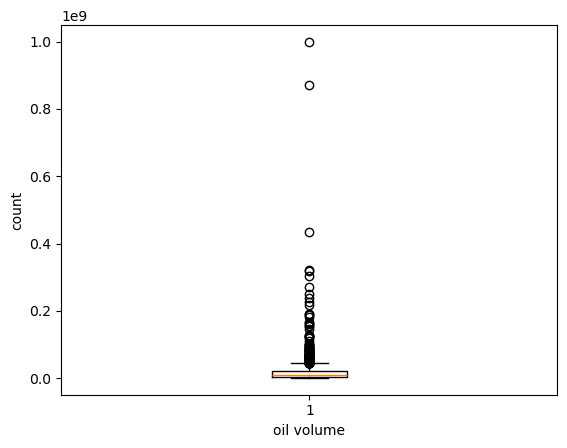

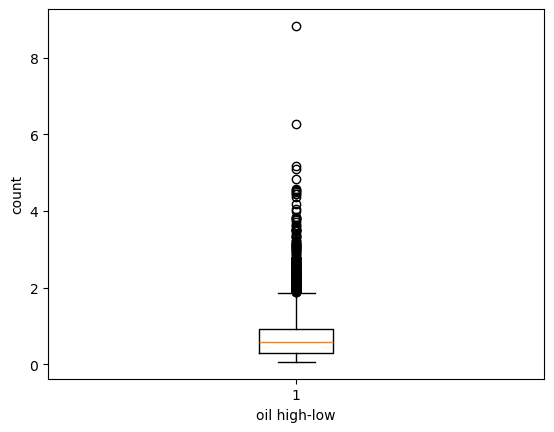

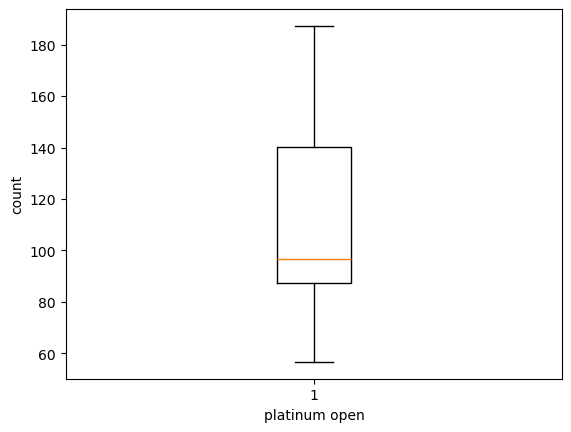

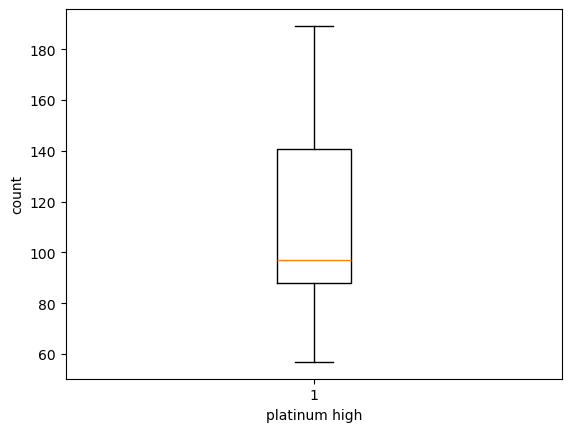

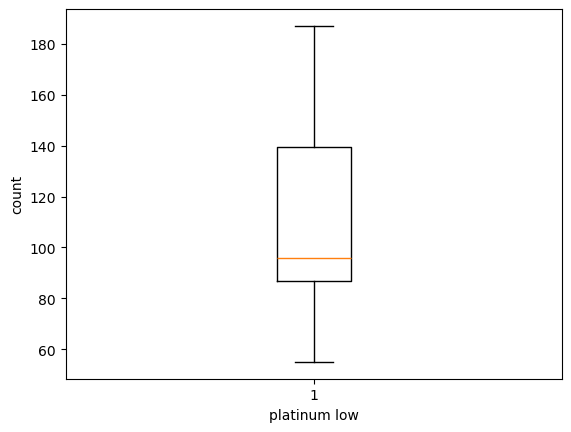

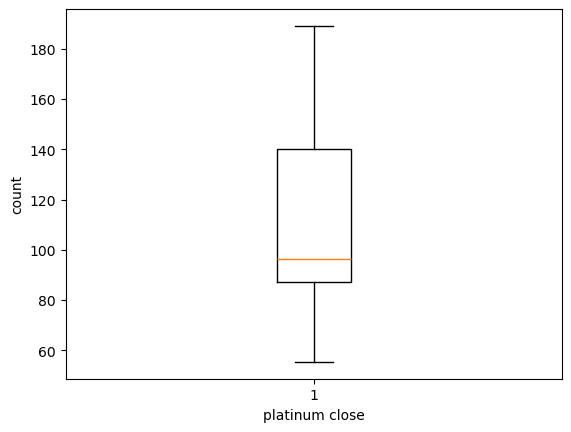

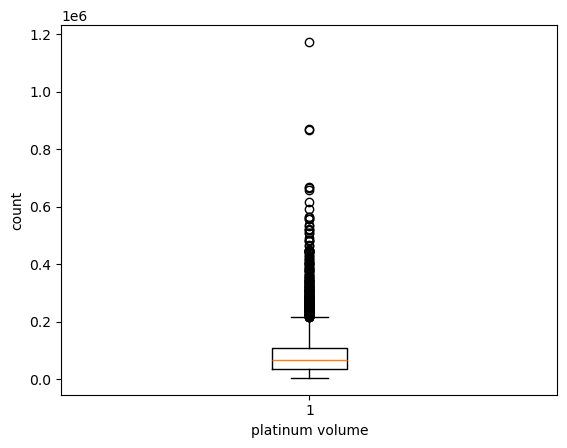

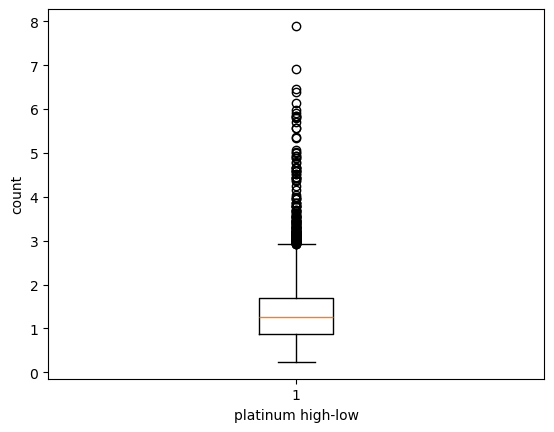

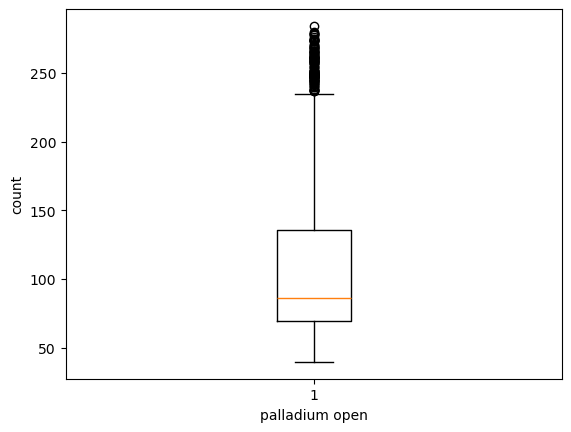

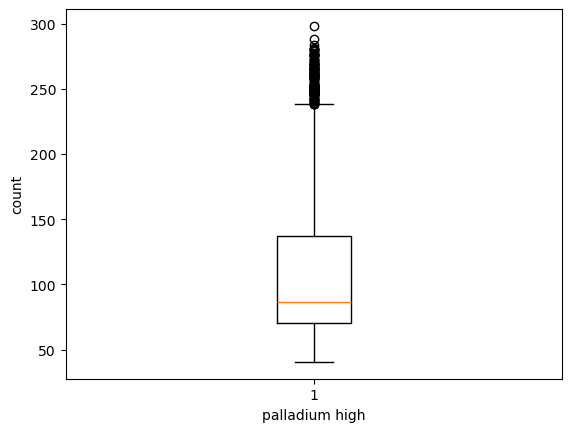

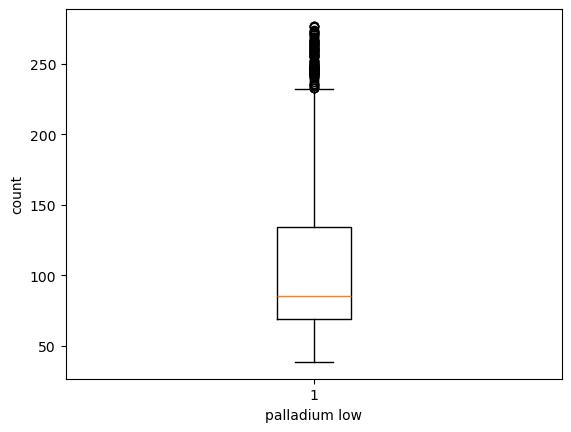

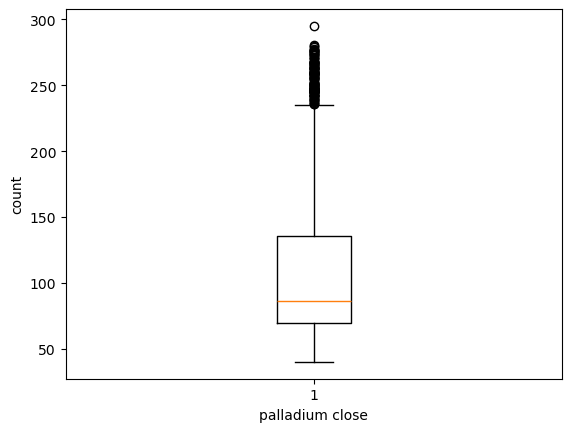

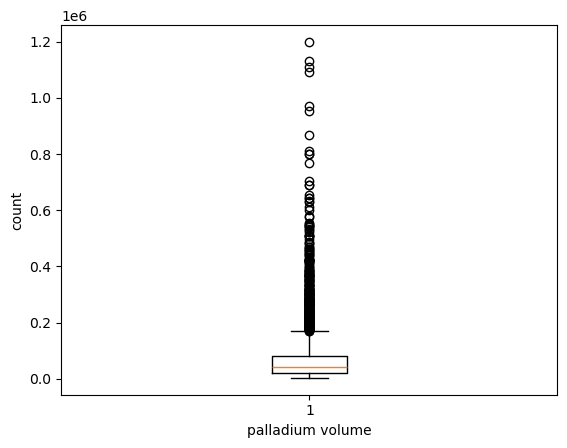

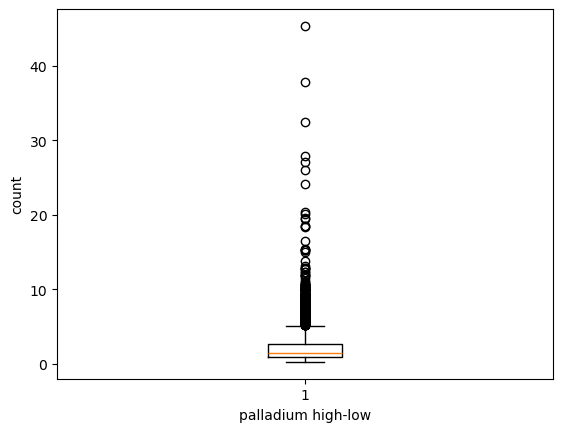

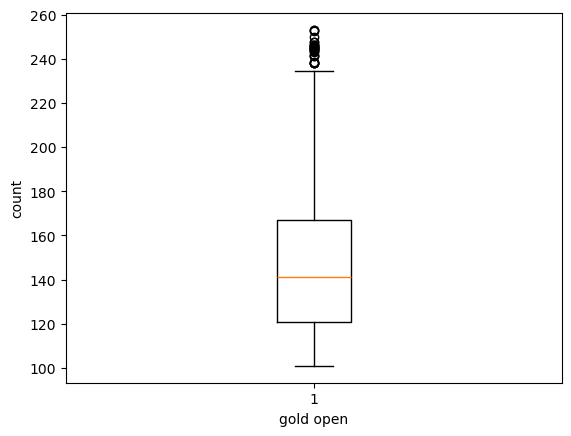

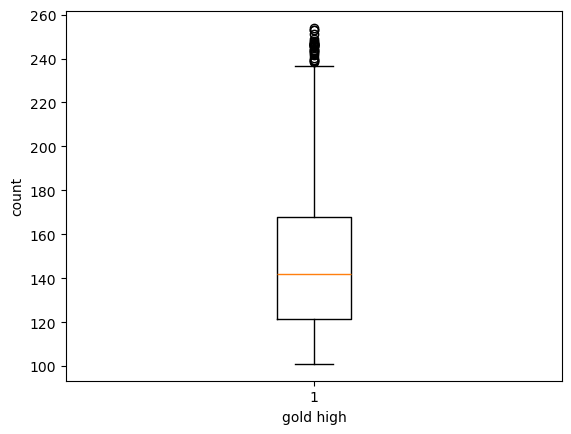

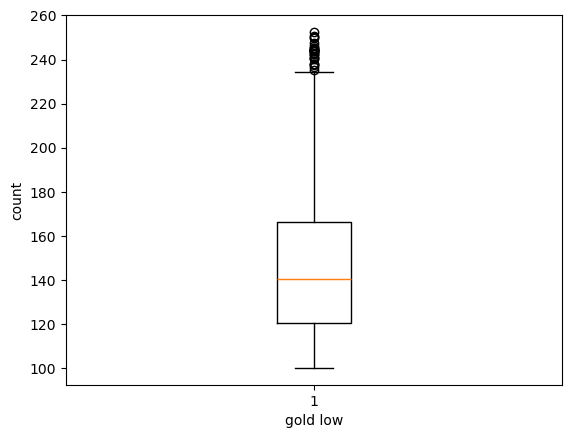

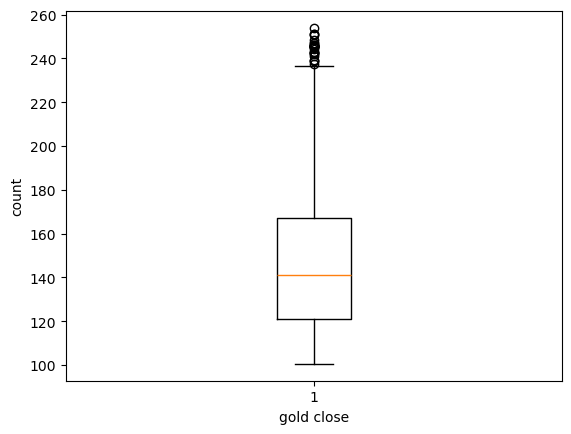

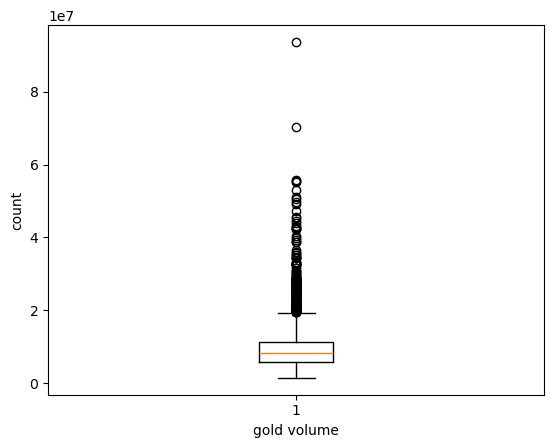

In [19]:
for i in col:
    if dt[i].dtypes=='int64' or dt[i].dtypes=='float64':
        plt.boxplot(dt[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [20]:
dt['date'] = pd.to_datetime(dt['date'])
dt['year'] = dt['date'].dt.year
dt['month'] = dt['date'].dt.month
dt['day'] = dt['date'].dt.day

In [21]:
dt.isna().sum()

date                  0
sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
eur_usd               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low        

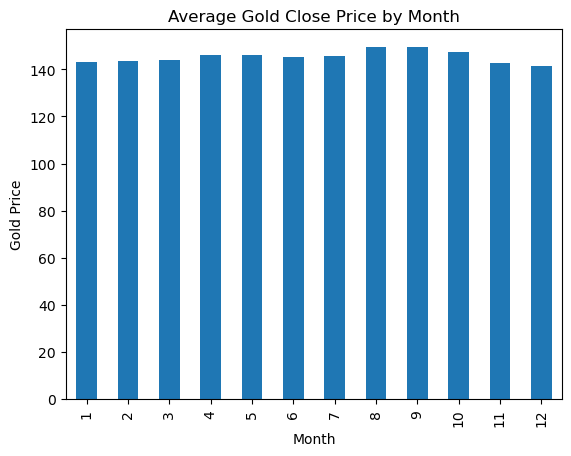

In [22]:
monthly_avg = dt.groupby(dt['date'].dt.month)['gold close'].mean()
monthly_avg.plot(kind='bar', title='Average Gold Close Price by Month')
plt.ylabel('Gold Price')
plt.xlabel('Month')
plt.show()

In [23]:
dt.drop(columns=['date'], inplace=True, errors='ignore')

In [24]:
dt.corr()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq volume,nasdaq high-low,usd_chf,eur_usd,silver open,silver high,silver low,silver close,silver volume,silver high-low,oil open,oil high,oil low,oil close,oil volume,oil high-low,platinum open,platinum high,platinum low,platinum close,platinum volume,platinum high-low,palladium open,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume,year,month,day
sp500 open,1.000000,0.999916,0.999889,0.999810,-0.514871,0.513681,0.991532,0.991454,0.991491,0.991358,-0.070258,0.698557,-0.326907,-0.660823,-0.062871,-0.064221,-0.061231,-0.062796,0.431248,-0.093521,0.581236,0.582049,0.580553,0.581251,-0.113449,0.473740,-0.694140,-0.692600,-0.696038,-0.694317,0.356111,-0.033040,0.644610,0.644674,0.644103,0.644019,-0.295577,0.412253,0.681216,0.679174,0.684501,0.681244,-0.283442,0.937586,0.021037,-0.002196
sp500 high,0.999916,1.000000,0.999823,0.999880,-0.511390,0.520522,0.991573,0.991627,0.991556,0.991538,-0.066025,0.703390,-0.326511,-0.661645,-0.063133,-0.064418,-0.061500,-0.062992,0.432826,-0.092335,0.581999,0.582860,0.581307,0.582053,-0.111854,0.476195,-0.694732,-0.693138,-0.696635,-0.694852,0.357773,-0.030768,0.646428,0.646575,0.645874,0.645887,-0.295013,0.416337,0.681915,0.679919,0.685170,0.681964,-0.281198,0.938219,0.020300,-0.002546
sp500 low,0.999889,0.999823,1.000000,0.999898,-0.520291,0.504377,0.991320,0.991262,0.991461,0.991325,-0.077327,0.691327,-0.327424,-0.660143,-0.062805,-0.064150,-0.061036,-0.062609,0.428961,-0.095717,0.580391,0.581205,0.579784,0.580474,-0.114903,0.470737,-0.693651,-0.692105,-0.695462,-0.693735,0.354157,-0.036226,0.642686,0.642729,0.642293,0.642185,-0.296271,0.408034,0.680457,0.678383,0.683810,0.680525,-0.286875,0.937084,0.021563,-0.001872
sp500 close,0.999810,0.999880,0.999898,1.000000,-0.516595,0.511622,0.991378,0.991433,0.991516,0.991548,-0.072500,0.696559,-0.326901,-0.660866,-0.062952,-0.064248,-0.061220,-0.062701,0.430718,-0.094225,0.581178,0.582025,0.580545,0.581292,-0.113728,0.473230,-0.694142,-0.692551,-0.695979,-0.694174,0.355758,-0.033430,0.644506,0.644616,0.644060,0.644041,-0.295603,0.411877,0.681226,0.679190,0.684539,0.681309,-0.284437,0.937657,0.020656,-0.002563
sp500 volume,-0.514871,-0.511390,-0.520291,-0.516595,1.000000,0.142159,-0.467185,-0.464952,-0.470823,-0.468469,0.737520,-0.071237,0.088468,0.443482,0.240568,0.244265,0.233090,0.237802,-0.016102,0.352142,-0.084205,-0.083261,-0.086780,-0.085356,0.096804,0.052549,0.518219,0.519359,0.514218,0.516408,-0.010298,0.340222,-0.323614,-0.320783,-0.329425,-0.325452,0.461173,-0.005533,-0.166782,-0.162057,-0.173572,-0.167480,0.582209,-0.530498,-0.052395,-0.016665
sp500 high-low,0.513681,0.520522,0.504377,0.511622,0.142159,1.000000,0.519660,0.524764,0.512485,0.517817,0.479421,0.908335,-0.125892,-0.407330,-0.047243,-0.045153,-0.052592,-0.049652,0.397360,0.106313,0.371284,0.373854,0.367073,0.370015,0.081169,0.491919,-0.405150,-0.402158,-0.410304,-0.406832,0.347556,0.232125,0.501265,0.506002,0.493619,0.499144,-0.094053,0.590448,0.415688,0.418188,0.412921,0.414887,0.113734,0.532366,-0.046970,-0.031927
nasdaq open,0.991532,0.991573,0.991320,0.991378,-0.467185,0.519660,1.000000,0.999929,0.999901,0.999811,-0.024480,0.707384,-0.358925,-0.612498,0.013091,0.011979,0.014500,0.013234,0.471793,-0.038079,0.624716,0.625473,0.624173,0.624821,-0.124876,0.499192,-0.637935,-0.636022,-0.640339,-0.638073,0.387585,0.017051,0.645362,0.645686,0.644569,0.644717,-0.249597,0.425092,0.738224,0.736407,0.741082,0.738189,-0.241723,0.912474,0.024899,-0.001501
nasdaq high,0.991454,0.991627,0.991262,0.991433,-0.464952,0.524764,0.999929,1.000000,0.999871,0.999896,-0.021073,0.711842,-0.358448,-0.613167,0.012776,0.011710,0.014176,0.012967,0.473270,-0.037244,0.625510,0.626297,0.624946,0.625630,-0.124000,0.501442,-0.638388,-0.636439,-0.640800,-0.638489,0.388848,0.018763,0.646907,0.647291,0.64606

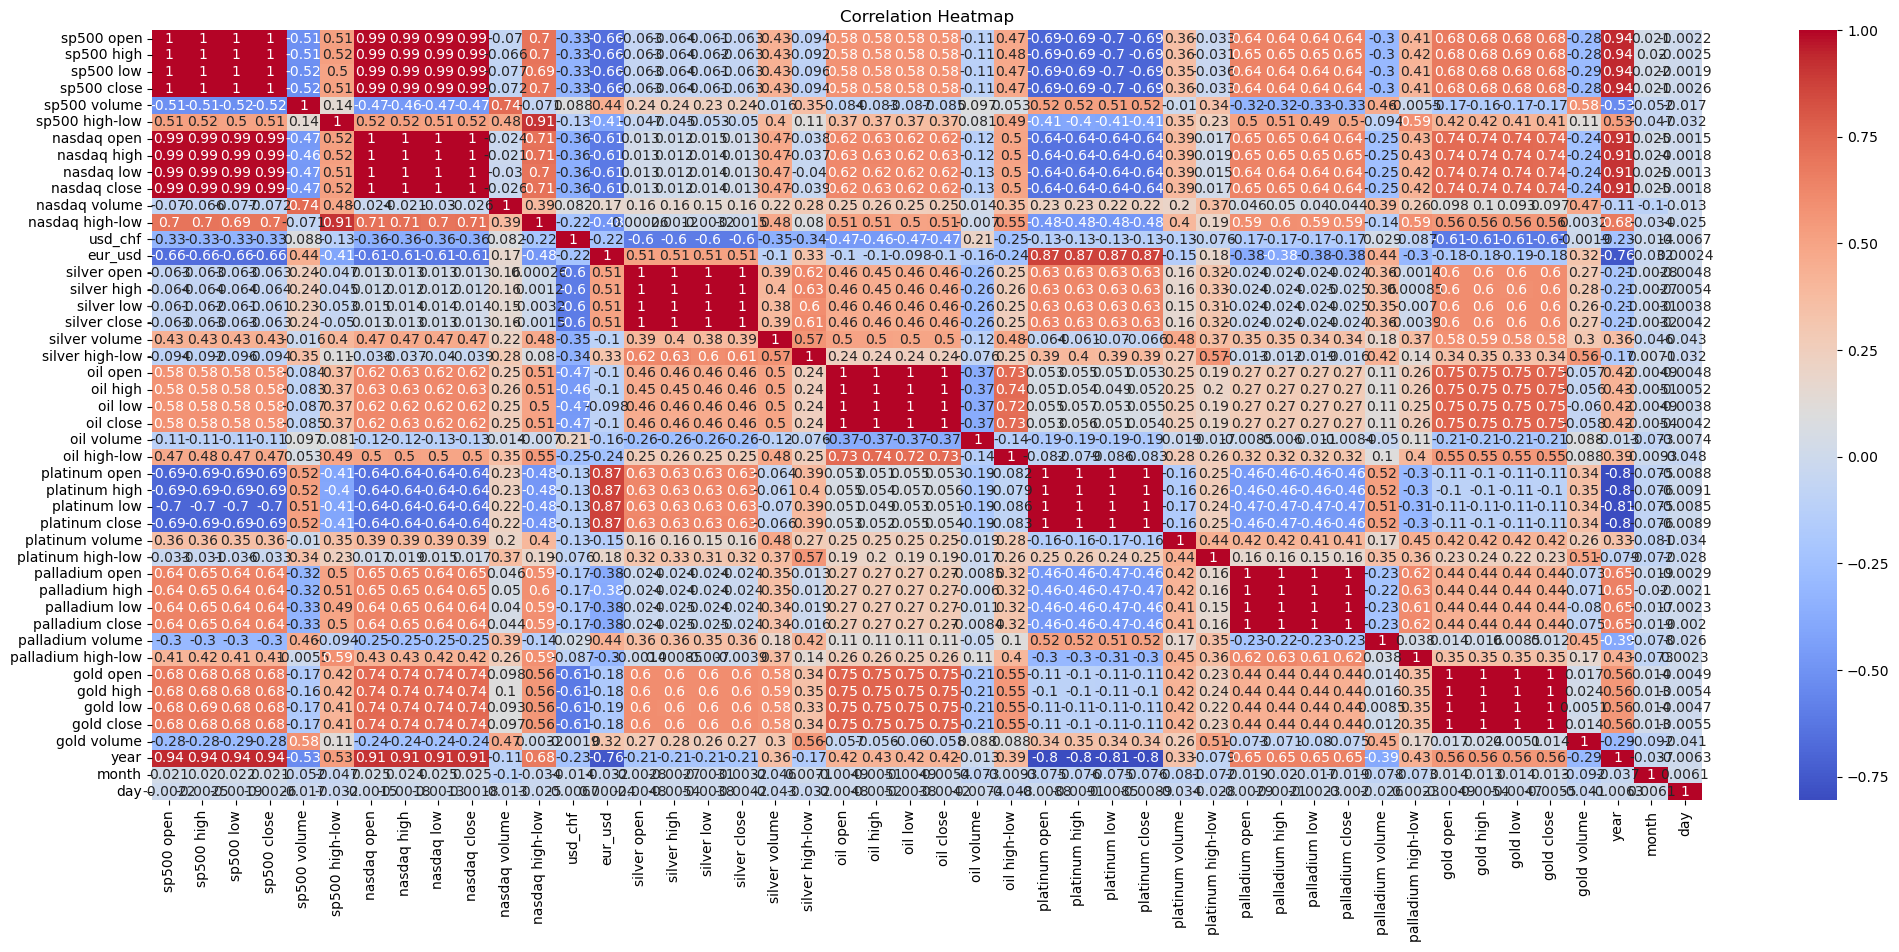

In [25]:
plt.figure(figsize=(25, 10))
sns.heatmap(dt.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
cor_matrix = dt.corr()
gold_corr = cor_matrix['gold close'].sort_values(ascending=False)
gold_corr


gold close            1.000000
gold low              0.999764
gold high             0.999743
gold open             0.999463
oil close             0.754307
oil high              0.754081
oil low               0.754048
oil open              0.753937
nasdaq high           0.738573
nasdaq open           0.738189
nasdaq close          0.738153
nasdaq low            0.737749
sp500 high            0.681964
sp500 close           0.681309
sp500 open            0.681244
sp500 low             0.680525
silver low            0.601549
silver close          0.601086
silver open           0.600088
silver high           0.599920
silver volume         0.580832
year                  0.558158
nasdaq high-low       0.557646
oil high-low          0.552383
palladium high        0.440820
palladium open        0.439334
palladium close       0.439038
palladium low         0.437356
platinum volume       0.418378
sp500 high-low        0.414887
palladium high-low    0.350614
silver high-low       0.340583
platinum

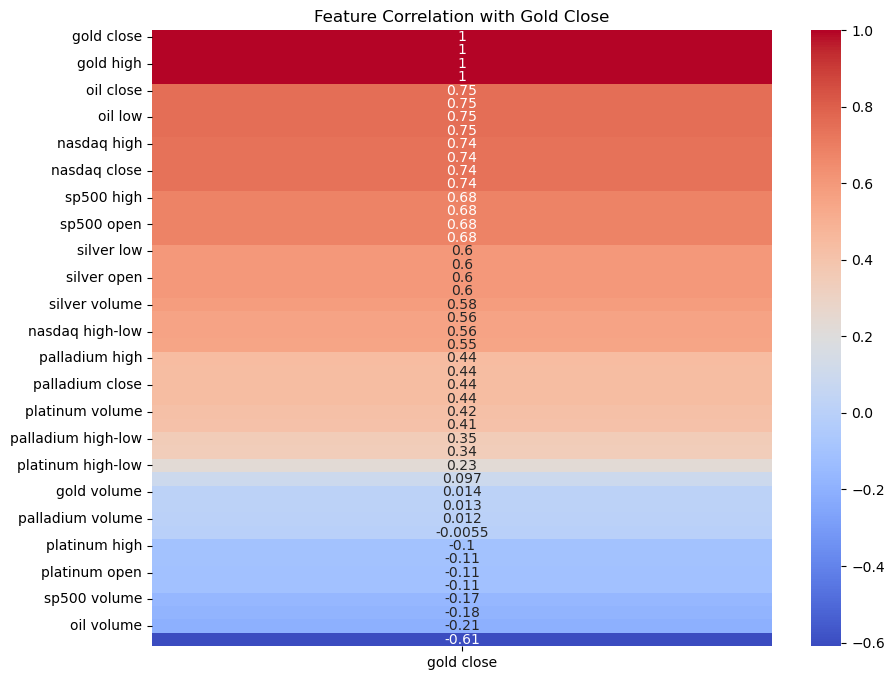

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(dt.corr()[['gold close']].sort_values(by='gold close', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Gold Close")
plt.show()

In [28]:
X = dt.drop(columns=['gold close'], errors='ignore')
y = dt['gold close']

In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled

array([[-0.72929206, -0.72688786, -0.73803127, ..., -0.875     ,
        -1.        , -0.13333333],
       [-0.72799655, -0.72849472, -0.74475443, ..., -0.875     ,
        -1.        , -0.06666667],
       [ 0.10330476,  0.1035338 ,  0.10367126, ..., -0.875     ,
        -1.        ,  0.13333333],
       ...,
       [ 1.80429678,  1.78896578,  1.83098491, ...,  0.875     ,
         0.8       ,  0.33333333],
       [ 1.78918248,  1.78709111,  1.82977199, ...,  0.875     ,
         0.8       ,  0.4       ],
       [ 1.79031605,  1.77213986,  1.79690019, ...,  0.875     ,
         0.8       ,  0.46666667]])

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
print("\nMAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.18620655397617547
MSE: 0.06644581962014376
R2 Score: 0.9999189712917342


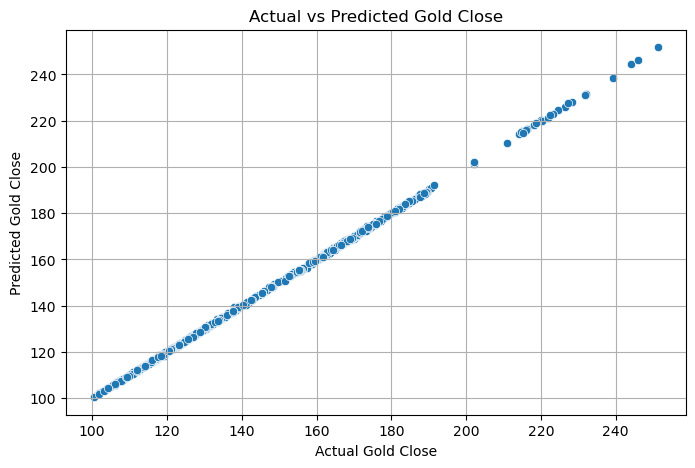

In [35]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Gold Close")
plt.ylabel("Predicted Gold Close")
plt.title("Actual vs Predicted Gold Close")
plt.grid(True)
plt.show()

In [40]:
# Ridge Regression 

In [36]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import *

In [37]:
tscv = TimeSeriesSplit(n_splits=5)   # used ofr cross validation 

In [38]:
ridge = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # regularization strength
}

param_grid

{'alpha': [0.01, 0.1, 1, 10, 100]}

In [39]:
grid_search = GridSearchCV(ridge, param_grid, cv=tscv,
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_scaled, y)



GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [40]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.01}


In [41]:
y_pred = best_model.predict(X_scaled)
y_pred

array([111.79558051, 111.12476437, 145.50366372, ..., 251.78388221,
       253.75281855, 251.21962919])

In [42]:
split_index = int(len(y) * 0.8)
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]

In [43]:
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)



In [44]:
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, best_model.predict(X_train))))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test R²:", r2_score(y_test, y_pred_test))

Train RMSE: 0.25843108042057245
Test RMSE: 0.3710434822955347
Test MAE: 0.2789497976189586
Test R²: 0.9997515747960835


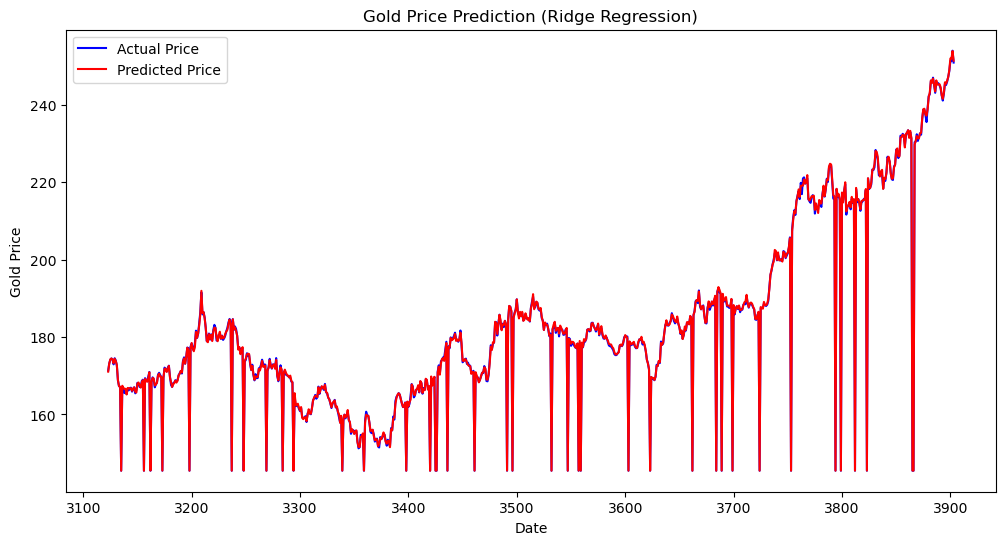

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Price", color="blue")
plt.plot(y_test.index, y_pred_test, label="Predicted Price", color="red")
plt.title("Gold Price Prediction (Ridge Regression)")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()


In [51]:
# DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
clf_en = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=0,min_samples_leaf=10)


In [48]:
clf_en.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=0)

In [49]:
y_pred_en = clf_en.predict(X_test)

y_pred_en

array([172.56957778, 172.56957778, 176.61588235, 172.56957778,
       176.61588235, 172.56957778, 176.61588235, 172.56957778,
       172.56957778, 169.26794615, 166.67999531, 166.67999531,
       145.55664098, 166.67999531, 166.67999531, 169.26794615,
       166.67999531, 166.67999531, 166.67999531, 166.67999531,
       166.67999531, 166.67999531, 166.67999531, 166.67999531,
       166.67999531, 166.67999531, 166.67999531, 166.67999531,
       169.26794615, 166.67999531, 166.67999531, 166.67999531,
       169.26794615, 145.55664098, 169.26794615, 169.26794615,
       166.67999531, 169.26794615, 172.56957778, 145.55664098,
       169.26794615, 169.26794615, 169.26794615, 166.67999531,
       166.67999531, 166.67999531, 169.26794615, 172.56957778,
       169.26794615, 169.26794615, 145.55664098, 169.26794615,
       172.56957778, 172.56957778, 172.56957778, 172.56957778,
       172.56957778, 169.26794615, 169.26794615, 166.67999531,
       166.67999531, 169.26794615, 169.26794615, 169.26

In [50]:
y_test

3123    171.29
3124    173.15
3125    174.12
3126    174.45
3127    174.18
         ...  
3899    248.63
3900    251.27
3901    251.22
3902    253.93
3903    250.87
Name: gold close, Length: 781, dtype: float64

In [51]:
r2 = r2_score(y_test, y_pred_en)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_en))
mae = mean_absolute_error(y_test, y_pred_en)


In [52]:
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.4861318273084685
RMSE: 16.875351966633588
MAE: 8.123340997626032


In [53]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 284.7775


In [54]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array([112.23084906, 112.23084906, 145.55664098, ..., 166.67999531,
       169.26794615, 172.56957778])

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(mean_squared_error(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7873


In [56]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9983
Test set score: 0.4861


In [63]:
# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
classifier1 = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42) 

classifier1.fit(X_train, y_train) 

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)

In [75]:
predictions = classifier1.predict(X_test)
predictions

array([170.96464991, 173.19212098, 174.51714432, 173.94896546,
       174.58480703, 173.80842215, 174.62543905, 173.97156982,
       173.3062266 , 169.40377918, 167.05750533, 166.90384543,
       145.45421685, 167.75021498, 166.83398262, 168.12961065,
       166.69822638, 165.34517295, 166.37953952, 166.2499362 ,
       166.64337222, 166.64981365, 166.03106494, 166.61433656,
       167.03434812, 165.49504978, 165.28003451, 167.6680377 ,
       168.70663062, 167.58365997, 167.50947487, 167.99484932,
       168.70121317, 145.45421685, 169.13549373, 169.02554747,
       168.07506185, 169.07680918, 170.64031981, 145.45421685,
       168.69259539, 169.33281082, 169.70794257, 167.41285776,
       167.44904011, 167.84414991, 169.45693117, 170.43054683,
       169.70875019, 169.98939567, 145.45421685, 169.57828734,
       171.37376267, 171.98787918, 171.29554954, 171.32059689,
       172.26686341, 170.40812534, 168.68659994, 166.92999396,
       167.80993007, 168.39216682, 168.78168036, 168.15

In [76]:
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

In [77]:
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.537879904172262
RMSE: 16.003110613928474
MAE: 7.142778039509819


In [ ]:
# XG boost 

In [63]:
from xgboost import XGBRegressor

In [64]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.8, random_state=42)

In [65]:
xgb.fit(X_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [66]:
xgb_pred=classifier1.predict(X_test)

In [67]:
r2 = r2_score(y_test, xgb_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
mae = mean_absolute_error(y_test, xgb_pred)

In [68]:
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.5346158302165843
RMSE: 16.059528224227336
MAE: 7.171412586362063
